In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import chi2_contingency
import sklearn
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# import train data
train_data = pd.read_csv('training_set_values.csv')
train_data_labels = pd.read_csv('training_set_labels.csv')

In [3]:
# Put features and target together
train_data["status_group"] = train_data_labels["status_group"]
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
df = train_data["construction_year"].unique()
train_data.groupby(["construction_year","status_group"]).count()

id  amount_tsh  date_recorded  \
construction_year status_group                                                
0                 functional               10555       10555          10555   
                  functional needs repair   1789        1789           1789   
                  non functional            8365        8365           8365   
1960              functional                  24          24             24   
                  functional needs repair      6           6              6   
                  non functional              72          72             72   
1961              functional                   2           2              2   
                  functional needs repair      3           3              3   
                  non functional              16          16             16   
1962              functional                   7           7              7   
                  functional needs repair      1           1              1   
                  non functional              22          22             22   
1963              functional                  31          31             31   
                  functional needs repair      6           6              6   
                  non functional              48          48             48   
1964              functional                   7           7              7   
                  functional needs repair      1           1              1   
                  non functional              32          32             32   
1965              functional                  11          11             11   
                  functional needs repair      1           1              1   
                  non functional               7           7              7   
1966              functional                   6           6              6   
                  non functional              11          11             11   
1967              functional                  31          31             31   
                  functional needs repair     17          17             17   
                  non functional              40          40             40   
1968              functional                  22          22             22   
                  functional needs repair      4           4              4   
                  non functional              51          51             51   
1969              functional                  15          15             15   
                  functional needs repair      3           3              3   
                  non functional              41          41             41   
1970              functional                  99          99             99   
                  functional needs repair     15          15             15   
                  non functional             297         297            297   
1971              functional                  82          82             82   
                  functional needs repair      6           6              6   
                  non functional              57          57             57   
1972              functional                 178         178            178   
                  functional needs repair     68          68             68   
                  non functional             462         462            462   
1973              functional                  55          55             55   
                  functional needs repair      8           8              8   
                  non functional             121         121            121   
1974              functional                 234         234            234   
                  functional needs repair     39          39             39   
                  non functional             403         403            403   
1975              functional                 144         144            144   
                  functional needs repair     41          41             41   
                 

In [5]:
dummy_df = train_data[train_data["longitude"] > -1]
dummy_df = dummy_df.groupby("status_group").count()
dummy_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,32259,32259,32259,30278,32259,30259,32259,32259,32259,32259,32259,32054,32259,32259,32259,32259,32259,32259,30581,32259,30386,17771,30586,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259
functional needs repair,4317,4317,4317,3880,4317,3877,4317,4317,4317,4317,4317,4316,4317,4317,4317,4317,4317,4317,4161,4317,4094,2313,4017,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317
non functional,22824,22824,22824,21607,22824,21609,22824,22824,22824,22824,22824,22659,22824,22824,22824,22824,22824,22824,21324,22824,21043,11150,21741,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824


In [6]:
dummy_df2 = train_data
dummy_df2 = dummy_df2.groupby("status_group").count()
dummy_df2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,32259,32259,32259,30278,32259,30259,32259,32259,32259,32259,32259,32054,32259,32259,32259,32259,32259,32259,30581,32259,30386,17771,30586,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259,32259
functional needs repair,4317,4317,4317,3880,4317,3877,4317,4317,4317,4317,4317,4316,4317,4317,4317,4317,4317,4317,4161,4317,4094,2313,4017,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317
non functional,22824,22824,22824,21607,22824,21609,22824,22824,22824,22824,22824,22659,22824,22824,22824,22824,22824,22824,21324,22824,21043,11150,21741,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824,22824


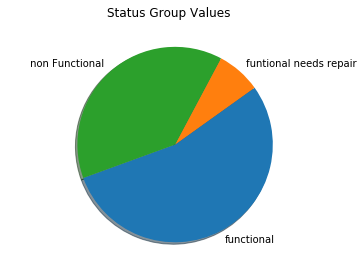

In [57]:
labels = ["functional", "funtional needs repair" ," non Functional"]
sizes = [27164, 3665, 19171]

plt.pie(sizes,  labels=labels , shadow=True, startangle=200)
plt.suptitle(f"Status Group Values")
plt.axis('equal')
plt.savefig(f"../static/images/Status_group_all_lat", bbox_inches = "tight")
plt.show()

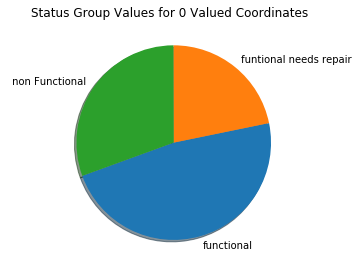

In [58]:
labels = ["functional", "funtional needs repair" ," non Functional"]
sizes = [725, 332,464]

plt.pie(sizes,  labels=labels , shadow=True, startangle=200)
plt.suptitle(f"Status Group Values for 0 Valued Coordinates")
plt.axis('equal')
plt.savefig(f"../static/images/Status_group_0_lats", bbox_inches = "tight")
plt.show()

In [9]:
dummy_df = train_data

In [10]:
dummy_df_not_0 = dummy_df[dummy_df["longitude"] > 2]

In [11]:
dummy_df = dummy_df_not_0.groupby('ward').mean()

In [12]:
dummy_df = dummy_df.reset_index()

In [13]:
dummy_df = dummy_df[["ward","longitude","latitude"]]

In [14]:
dummy_df = dummy_df.rename(columns={ "longitude": "longitude_temp", "latitude": "latitude_temp"})

In [15]:
train_data = train_data.join(dummy_df, on='ward')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
train_data["longitude"] = longitude

In [ ]:
# train_data = train_data[train_data["longitude"] < 2]
latitude = []
for index, row in train_data.iterrows():
    if row["latitude"] > - 1:
        latitude.append(row["latitude_temp"])
    else:
        latitude.append(row["latitude"])

In [ ]:
train_data["latitude"] = latitude

In [ ]:
# Scatter Plot for Longitude and latitude
lat_long_df = train_data[["longitude","latitude"]]
ax1 = lat_long_df.plot.scatter(x='longitude', y='latitude',c='blue')
plt.xlabel("Longitude")
plt.ylabel("Lattide")
plt.suptitle(f"Scatter Plot for Longitude and Latitude Features.")


In [ ]:
df = train_data[train_data["longitude"] < 5 ] 


In [ ]:
# Missing Value Treatment
# train_data.isnull()
columns = train_data.columns
mis_col_size = []
mis_col = []

for col in columns:
    bool_series = pd.isnull(train_data[col]) 
    number = len(train_data[bool_series])
    print(f" {number} is missing values in {col}") 
    if number > 0:
        mis_col_size.append(number)
        mis_col.append(col)    

In [ ]:
x_pos = [i for i, _ in enumerate(mis_col)]
plt.bar(x_pos,mis_col_size)
plt.xticks(x_pos, mis_col)
plt.xticks(rotation=90)
plt.suptitle(f"Coulmns with Missing Values")
#plt.xlabel(f"Columns Name")
plt.grid(linestyle='-', linewidth='1', color='grey')
plt.savefig(f"../static/images/Columns_with_missing_values", bbox_inches = "tight")
plt.show()


In [ ]:
# There are 7 columns which has mssing values, These are Funder, installer, subvillage, public_meeting, scheme_management and permit
# Scheme_management has over 25000 missing values while others has less then 5000.

In [ ]:
# Count unique values in columns
columns = train_data.columns
unique_col_size = []
unique_col = []


for col in train_data.columns:
    value = len(train_data[col].unique())
    print(f"Feature {col} has length of  {value} unique values.")
    if value > 100:
        unique_col_size.append(value)
        unique_col.append(col)    

In [ ]:
x_pos = [i for i, _ in enumerate(unique_col)]
plt.bar(x_pos,unique_col_size)
plt.xticks(x_pos, unique_col)
plt.xticks(rotation=90)
plt.suptitle(f"Columns which have more then 100 Unique Values")
#plt.xlabel(f"Columns Name")
plt.grid(linestyle='-', linewidth='1', color='grey')
plt.savefig(f"../static/images/Columns_with_unique_values", bbox_inches = "tight")
plt.show()

In [16]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1,-0.00532096,-0.00469226,-0.00134774,0.00171845,-0.00262871,-0.00302829,-0.0030437,-0.00281275,-0.00208209
amount_tsh,-0.00532096,1,0.0766503,0.0221342,-0.0526702,0.00294373,-0.026813,-0.0235994,0.0162876,0.0679152
gps_height,-0.00469226,0.0766503,1,0.149155,-0.0357514,0.00723688,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.00134774,0.0221342,0.149155,1,-0.425802,0.0238733,0.034197,0.151398,0.0865897,0.396732
latitude,0.00171845,-0.0526702,-0.0357514,-0.425802,1,0.00683683,-0.221018,-0.20102,-0.0221519,-0.245278
num_private,-0.00262871,0.00294373,0.00723688,0.0238733,0.00683683,1,-0.0203768,-0.00447751,0.00381836,0.0260556
region_code,-0.00302829,-0.026813,-0.183521,0.034197,-0.221018,-0.0203768,1,0.678602,0.0940884,0.0317241
district_code,-0.0030437,-0.0235994,-0.171233,0.151398,-0.20102,-0.00447751,0.678602,1,0.0618314,0.0483152
population,-0.00281275,0.0162876,0.135003,0.0865897,-0.0221519,0.00381836,0.0940884,0.0618314,1,0.26091
construction_year,-0.00208209,0.0679152,0.658727,0.396732,-0.245278,0.0260556,0.0317241,0.0483152,0.26091,1


In [17]:
# print train data features names and lenght of columns
print(len(train_data.columns))
print(train_data.columns)

41
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


In [18]:
# print types of the columns
#Variable Identification
# Variable Type : There is 40 predicter and 1 target variable
# Data Type : There are 31 Character and 10 Numeric Data types
# Variable Category : There are  33 Categorical and 7 Continuous (amount_tsh, gps_height, longitude, latitude, population,construction_year, date_recorded )
train_data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

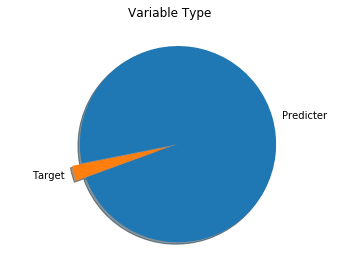

In [19]:
# Variable Type : There is 40 predicter and 1 target variable
labels = ["Predicter","Target"]
sizes = [40,1]
explode = (0.1, 0)
plt.pie(sizes,  explode =explode, labels=labels , shadow=True, startangle=200)
plt.suptitle(f"Variable Type")
plt.axis('equal')
plt.savefig(f"../static/images/Variable_ype_ie", bbox_inches = "tight")
plt.show()

In [ ]:
# Variable Type : There is 40 predicter and 1 target variable
labels = ["Functional","Functiona_needs_repair"," Non_Functional"]
sizes = [40,1]
explode = (0.1, 0)
plt.pie(sizes,  explode =explode, labels=labels , shadow=True, startangle=200)
plt.suptitle(f"Variable Type")
plt.axis('equal')
plt.savefig(f"../static/images/Variable_ype_ie", bbox_inches = "tight")
plt.show()

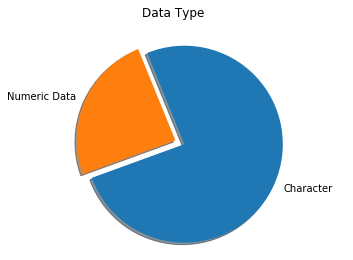

In [20]:
# Data Type : There are 31 Character and 10 Numeric Data types
# Variable Category : There are  33 Categorical and 7 Continuous (amount_tsh, gps_height, longitude, latitude, population,construction_year, date_recorded )
labels = ["Character","Numeric Data"]
sizes = [31,10]
explode = (0.1, 0)
plt.pie(sizes,  explode =explode, labels=labels , shadow=True, startangle=200)
plt.suptitle(f"Data Type")
plt.axis('equal')
plt.savefig(f"../static/images/Data_type_pie", bbox_inches = "tight")
plt.show()

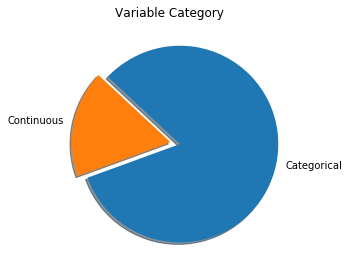

In [21]:
# Variable Category : There are  33 Categorical and 7 Continuous (amount_tsh, gps_height, longitude, latitude, population,construction_year, date_recorded )
labels = ["Categorical","Continuous"]
sizes = [33,7]
explode = (0.1, 0)
plt.pie(sizes,  explode =explode, labels=labels , shadow=True, startangle=200)
plt.suptitle(f"Variable Category")
plt.axis('equal')
plt.savefig(f"../static/images/Variable_category_pie", bbox_inches = "tight")
plt.show()

In [22]:
# There is no information about num_private
print(len(train_data["num_private"].unique()))
train_data["num_private"].unique()

65


array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402],
      dtype=int64)

In [23]:
# droped num private Column because it has no descritive information on it
train_data = train_data.drop("num_private", axis=1)
# droped Id Column because it is unique for each row
train_data = train_data.drop("id", axis=1)
# droped wpt_name because it is unique for each row
train_data = train_data.drop("wpt_name", axis=1)
# droped scheme_name Column because it has 28K missing value and almost 3k unique value
train_data = train_data.drop("scheme_name", axis=1)
train_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [24]:
# Univariate Analysis
# we explore variables one by one.
# First look at Central tendency Mean, Median, Mode, Mean, Max
# Second Measure of Dispertion Range, Qartile, IQR, Variance, Standart Devision, Skewness and Kurtosis
# Visualization Histogram and Boxplot

In [25]:
# Describe the train data numerical variables
train_data.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


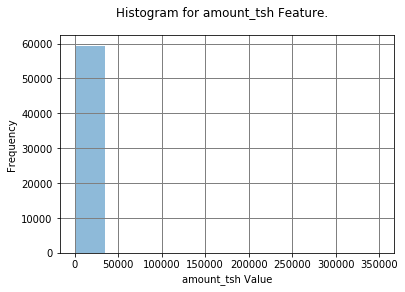

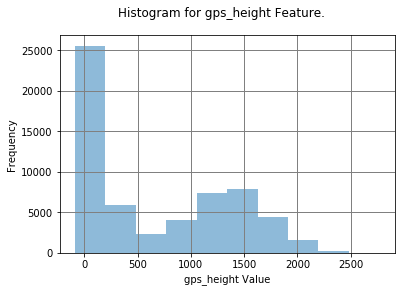

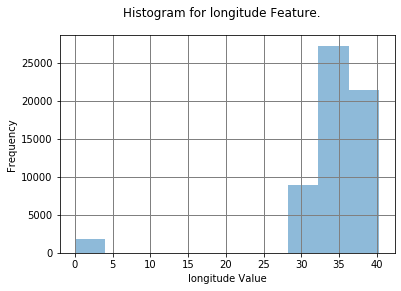

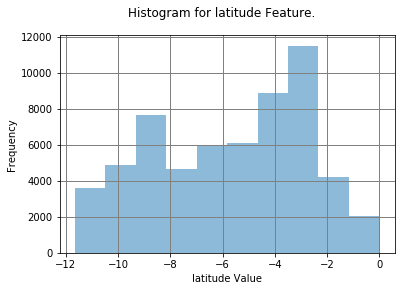

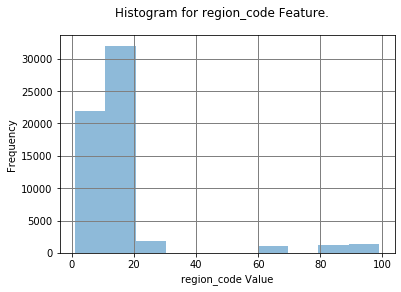

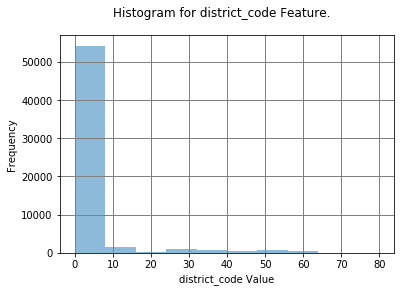

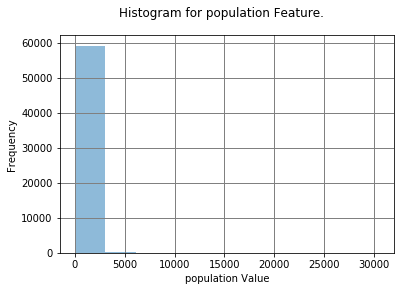

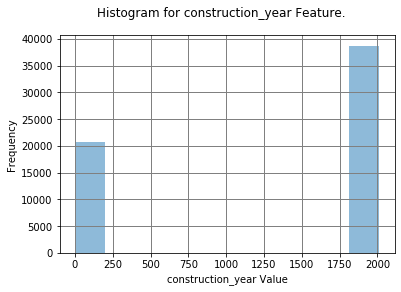

In [26]:
numerical_variables_df = train_data.describe()
names_list = numerical_variables_df.columns
for name in names_list:
    ax = train_data[name].plot.hist(bins=10, alpha=0.5)
    plt.suptitle(f"Histogram for {name} Feature.")
    plt.xlabel(f"{name} Value")
    plt.grid(linestyle='-', linewidth='1', color='grey')
    plt.savefig(f"../static/images/Before_Histogram_for_{name}_Feature.")
    plt.show()

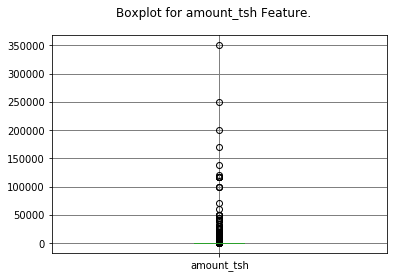

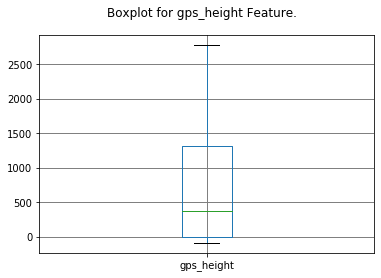

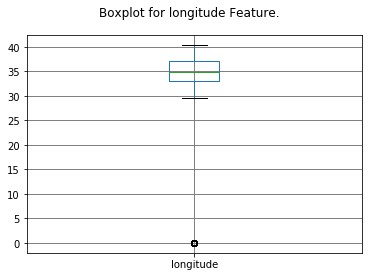

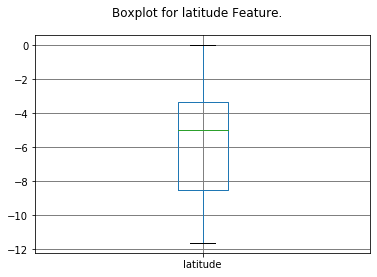

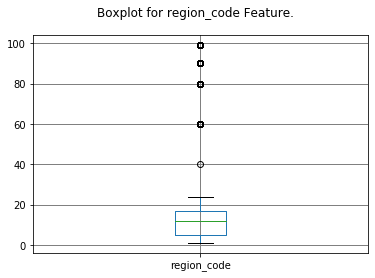

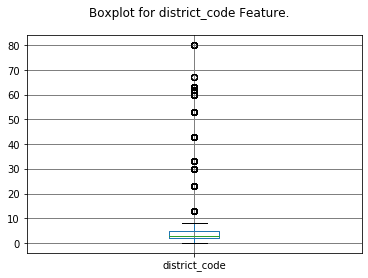

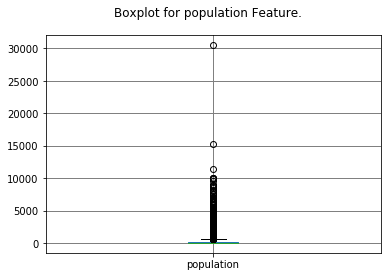

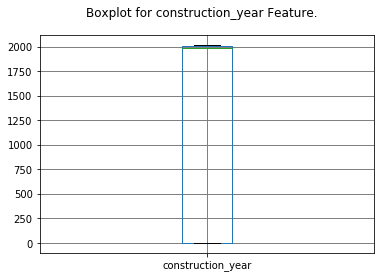

In [27]:
# Create Boxplot for Numerical features
for name in names_list:
    boxplot = train_data.boxplot(column=[name])
    plt.suptitle(f"Boxplot for {name} Feature.")
    plt.grid(linestyle='-', linewidth='1', color='grey')
    plt.savefig(f"../static/images/Before_Box_plot_for_{name}_Feature.")
    plt.show()

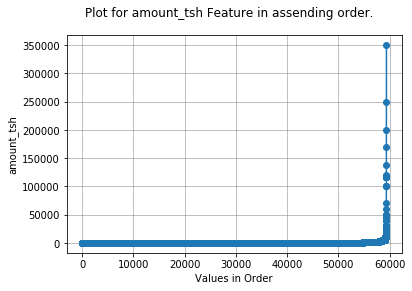

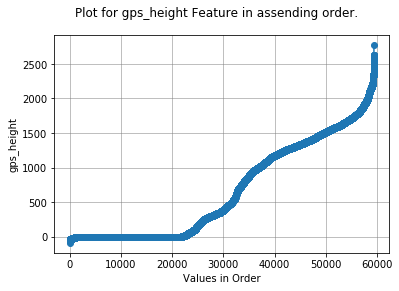

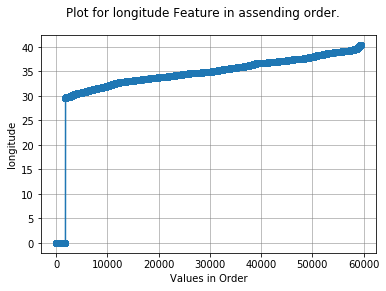

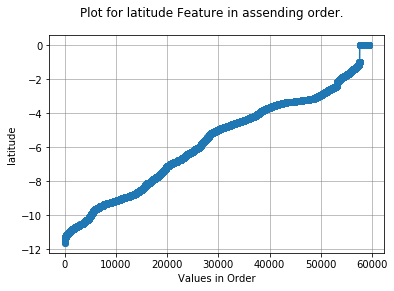

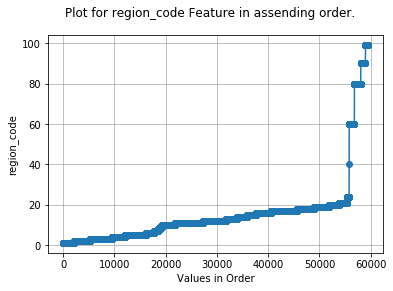

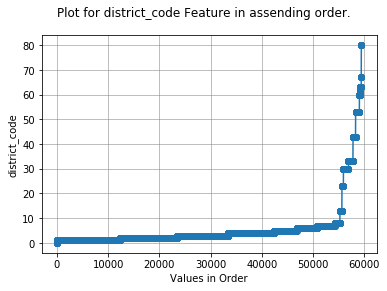

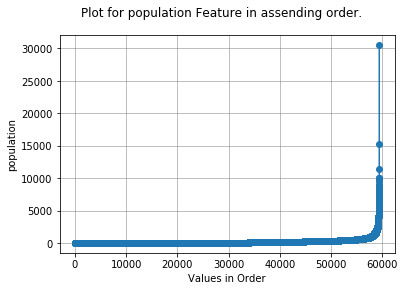

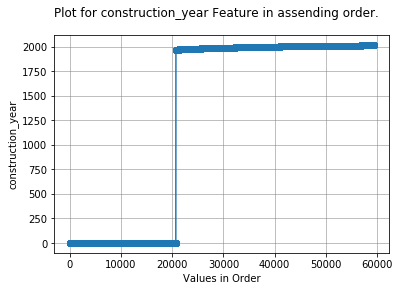

In [28]:
for name in names_list:
    y_values = train_data[name].sort_values(ascending=True)
    plt.plot(range(0, len(y_values) ), y_values, marker='o')
    #plt.plot(range(1, 40, 2), test_scores, marker="x")
    plt.xlabel("Values in Order")
    plt.ylabel(f"{name}")
    plt.suptitle(f"Plot for {name} Feature in assending order.")
    # Customize the grid
    plt.grid(linestyle='-', linewidth='0.5', color='grey')
    #save Plot to png
    plt.savefig(f"../static/images/Before_{name}.png")
    plt.show()

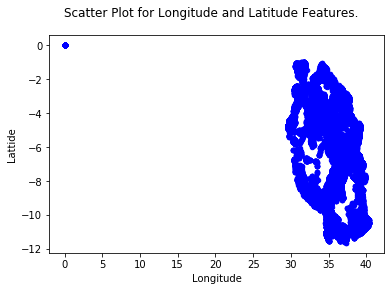

In [29]:
# Scatter Plot for Longitude and latitude
lat_long_df = train_data[["longitude","latitude"]]
ax1 = lat_long_df.plot.scatter(x='longitude', y='latitude',c='blue')
plt.xlabel("Longitude")
plt.ylabel("Lattide")
plt.suptitle(f"Scatter Plot for Longitude and Latitude Features.")
plt.savefig(f"../static/images/Before_Lat_Long_Features.")

Text(0.5, 1.0, 'Stacked Bar Chart for ')

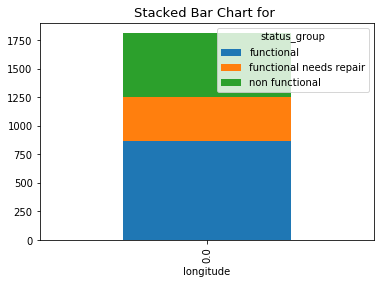

In [31]:
# Plot ) value longitudes
dummy_df = train_data[train_data["longitude"] < 1 ]
ax = dummy_df.groupby([ "longitude", 'status_group']).size().unstack().plot(kind='bar', stacked=True)
ax.set_alpha(0.8)
ax.set_title(f"Stacked Bar Chart for ", fontsize=13)

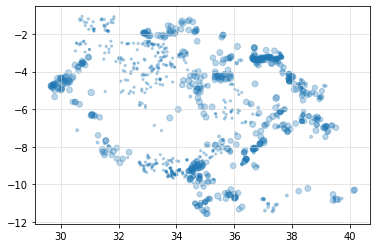

In [52]:
train_data = train_data.sample(n = 1000)
x = train_data["longitude"]
y = train_data["latitude"]
size = train_data["population"] + 1

# Scatter points
fig, ax = plt.subplots()


ax.scatter(x, y, s=5 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)

Text(0.5, 1.0, 'Ferequency Bar Chart for ')

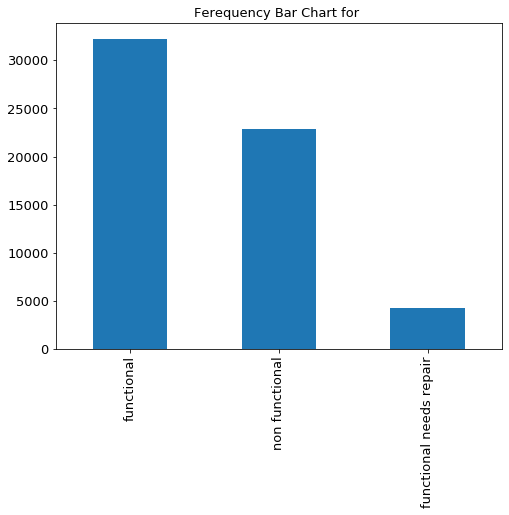

In [32]:
# frequency table for longitude ) values
ax = train_data["status_group"].value_counts().plot(kind='bar',figsize=(8,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title(f"Ferequency Bar Chart for ", fontsize=13)

Text(0.5, 1.0, 'Ferequency Bar Chart for ')

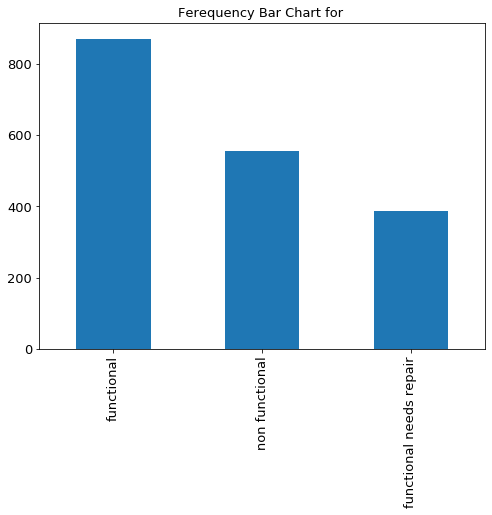

In [33]:
# frequency table for longitude ) values
ax = dummy_df["status_group"].value_counts().plot(kind='bar',figsize=(8,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title(f"Ferequency Bar Chart for ", fontsize=13)

In [34]:
# delete the 0 values columns from dataset
train_data = train_data[train_data['longitude'] > 5]
train_data = train_data[train_data['latitude'] < 1]

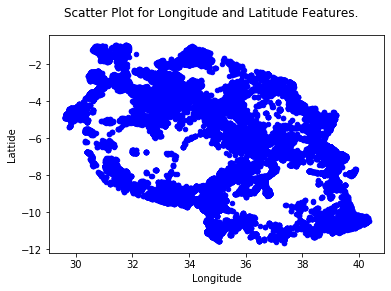

In [35]:
# Plot "longitude","latitude" values on scatter plot
lat_long_df = train_data[["longitude","latitude"]]
ax1 = lat_long_df.plot.scatter(x='longitude', y='latitude',c='Blue')
plt.xlabel("Longitude")
plt.ylabel("Lattide")
plt.suptitle(f"Scatter Plot for Longitude and Latitude Features.")
plt.savefig(f"../static/images/After_Lat_Long_Features.")
plt.show()

In [36]:
# Binning columns
# amount_tsh
bins_for_amount_tsh = [-1, 1, 5, 10, 25, 50, 100,1000,10000,100000]
group_names = [0,1,2,3,4,5,6,7,8]
train_data["binned_amount_tsh"] = pd.cut(train_data["amount_tsh"], bins_for_amount_tsh, labels=group_names)
train_data["binned_amount_tsh"]

# Region code
bins_for_region_code = [-1, 5, 10, 15, 25, 50]
group_names = [0,1,2,3,4]
train_data["binned_region_code"] = pd.cut(train_data["region_code"], bins_for_region_code, labels=group_names)
train_data["binned_region_code"]

# District code
bins_for_district_code = [-1, 2, 4, 8, 10, 50]
group_names = [0,1,2,3,4]
train_data["binned_district_code"] = pd.cut(train_data["district_code"],bins_for_district_code, labels=group_names)
train_data["binned_district_code"]


# Population
bins_for_population = [-1, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 2000, 50000]
group_names = [0,1,2,3,4,5,6,7,8,9,10,11]
train_data["binned_population"] = pd.cut(train_data["population"], bins_for_population, labels=group_names)
train_data["binned_population"]

# Consruction Year
bins_for_construction_year = [-1, 1000, 2020]
group_names = [0,1]
train_data["binned_construction_year"] = pd.cut(train_data["construction_year"], bins_for_construction_year, labels=group_names)
train_data["construction_year"]

0        1999
1        2010
2        2009
3        1986
4           0
         ... 
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 57588, dtype: int64

In [37]:
# Fillna
train_data = train_data.fillna(method='ffill')

In [38]:
train_data["binned_amount_tsh"] = train_data["binned_amount_tsh"].astype('int32')
train_data["binned_region_code"] = train_data["binned_region_code"].astype('int32')
train_data["binned_district_code"] = train_data["binned_district_code"].astype('int32')
train_data["binned_population"] = train_data["binned_population"].astype('int32')
train_data["binned_construction_year"] = train_data["binned_construction_year"].astype('int32')

In [39]:
train_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,7,2,2,2,1
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,4,1
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,3,3,1,4,1
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0,3,1,1,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,0,0


In [40]:
# Date recorded getting year and month in seperate collumn
date_recorded = train_data[["date_recorded","status_group"]]
year = date_recorded["date_recorded"].str[0:4]
month = date_recorded["date_recorded"].str[5:7]
train_data["recorded_year"] = year
train_data["recorded_month"] = month
#drop date recorded column
train_data = train_data.drop("date_recorded",axis= 1)
#convert object type to int 
train_data["recorded_year"] = train_data["recorded_year"].astype('int32')
train_data["recorded_month"] = train_data["recorded_month"].astype('int32')


In [41]:
#creating Difference between date recorded and contruction
train_data["diff_between_cons_recorded"] = train_data["recorded_year"] - train_data["construction_year"]
train_data.head() 

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year,recorded_year,recorded_month,diff_between_cons_recorded
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,7,2,2,2,1,2011,3,12
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,4,1,2013,3,3
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,3,3,1,4,1,2013,2,4
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0,3,1,1,1,2013,1,27
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,0,0,2011,7,2011


In [42]:
# Delete outliers from continioues columns
train_data = train_data[(np.abs(stats.zscore(train_data[["amount_tsh","population","region_code","district_code","binned_amount_tsh","binned_region_code",
                                                        "binned_district_code","binned_population","binned_construction_year","recorded_year"]])) < 3).all(axis=1)]
train_data.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year,recorded_year,recorded_month,diff_between_cons_recorded
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,7,2,2,2,1,2011,3,12
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,4,1,2013,3,3
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,3,3,1,4,1,2013,2,4
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,0,0,2011,7,2011
5,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,3,0,2,0,1,2011,3,2


In [43]:
# Just Looking at recorded years count
train_data.groupby(['recorded_year']).count()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year,recorded_month,diff_between_cons_recorded
recorded_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945,26945
2012,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899
2013,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412,20412


In [44]:
# Gettting log of columns has outliers in box plot
train_data['amount_tsh'] = np.log(train_data['amount_tsh'] + 1)
train_data['district_code'] = np.log(train_data['district_code'] + 1)
train_data['region_code'] = np.log(train_data['region_code'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['diff_between_cons_recorded'] = np.log(train_data['diff_between_cons_recorded'] + 3000)

In [45]:
len(train_data)

53256

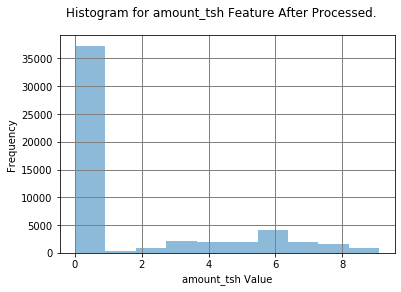

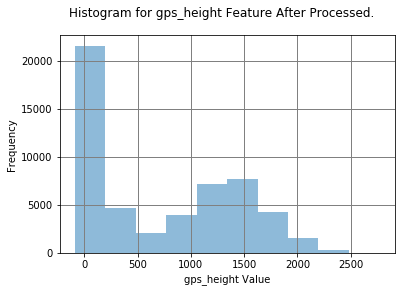

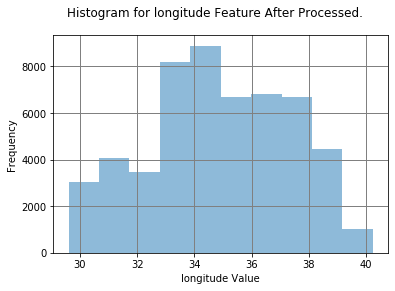

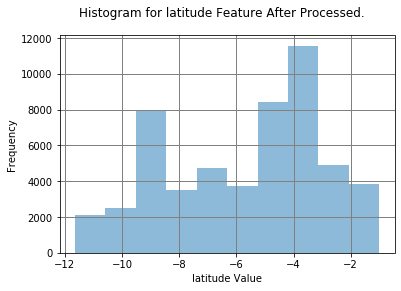

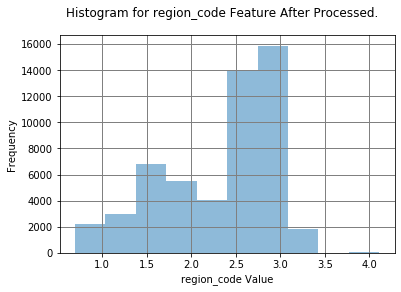

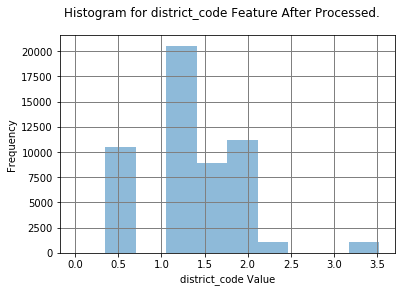

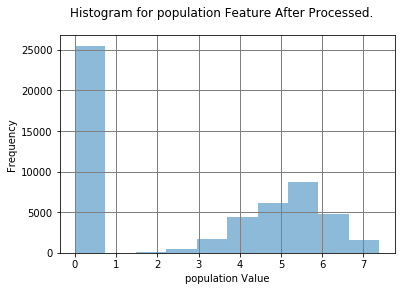

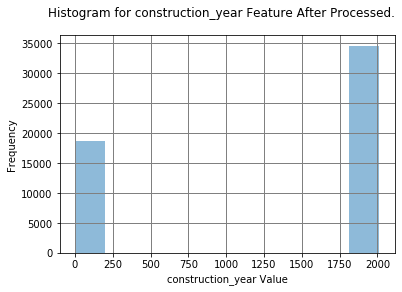

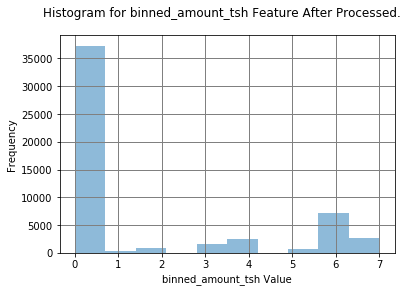

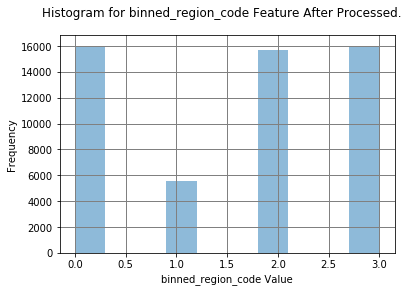

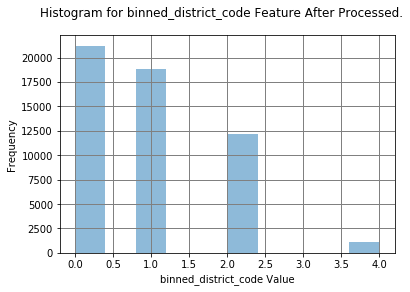

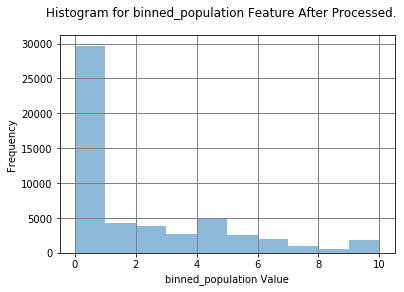

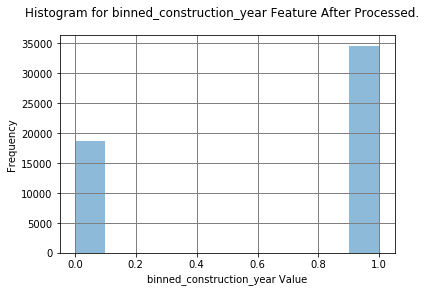

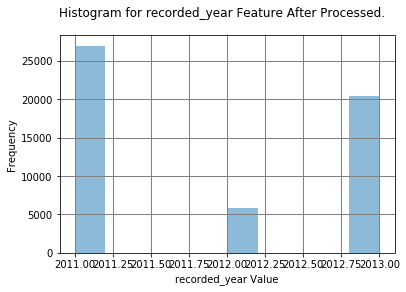

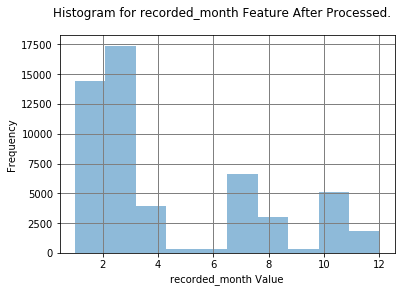

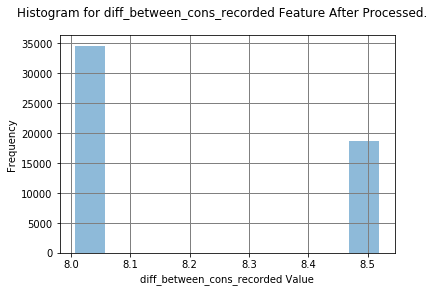

In [46]:
numerical_variables_df = train_data.describe()
names_list = numerical_variables_df.columns
for name in names_list:
    ax = train_data[name].plot.hist(bins=10, alpha=0.5)
    plt.suptitle(f"Histogram for {name} Feature After Processed.")
    plt.grid(linestyle='-', linewidth='1', color='grey')
    plt.xlabel(f"{name} Value")
    plt.savefig(f"../static/images/After_Histogram_for_{name}_Feature.")
    plt.show()

In [47]:
len(train_data["population"])

53256

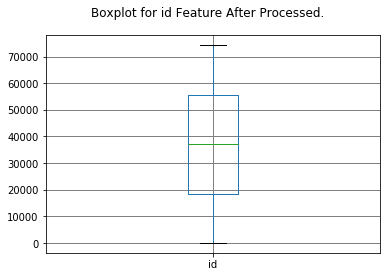

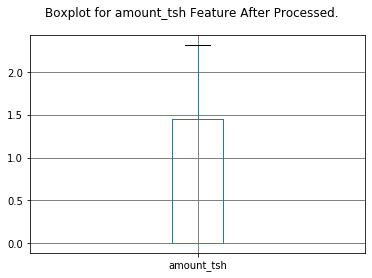

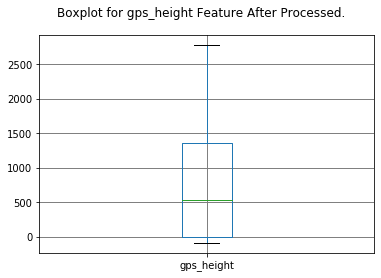

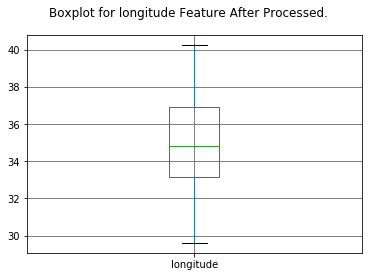

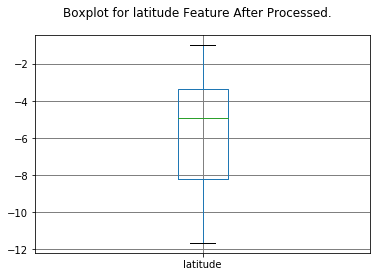

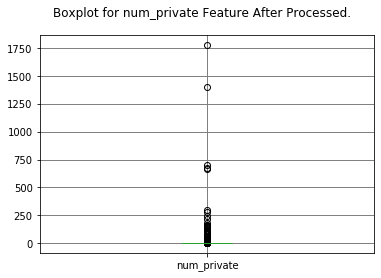

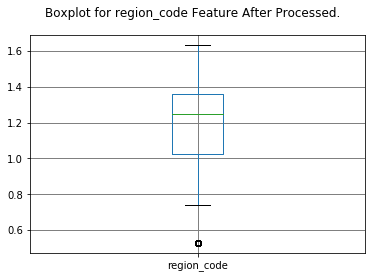

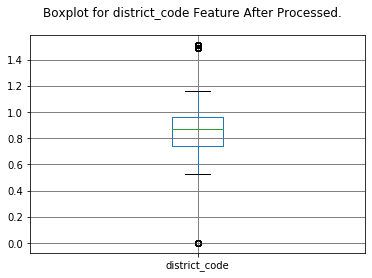

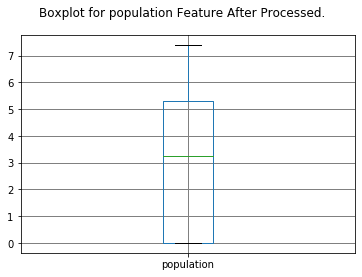

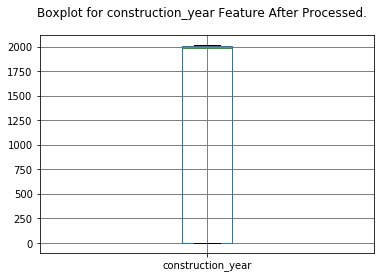

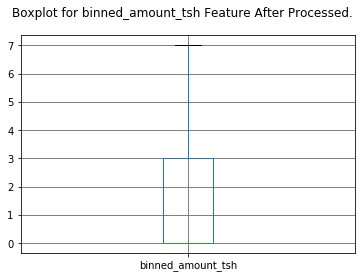

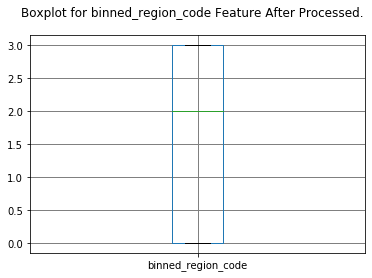

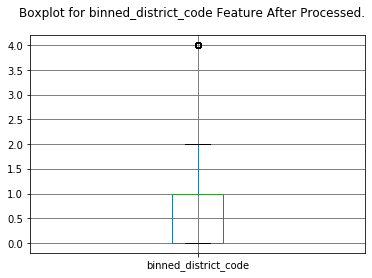

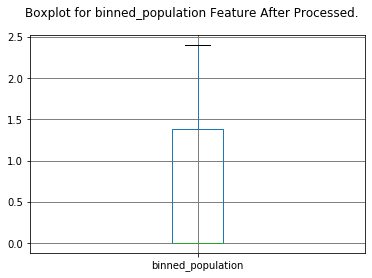

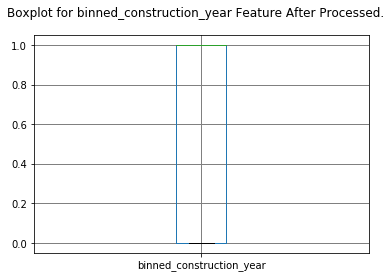

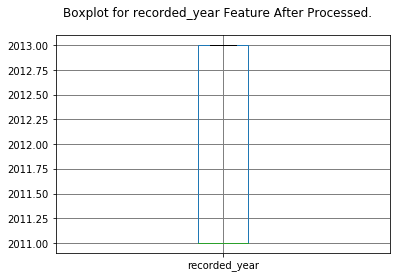

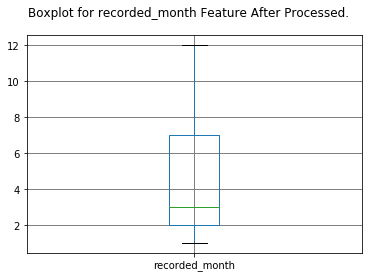

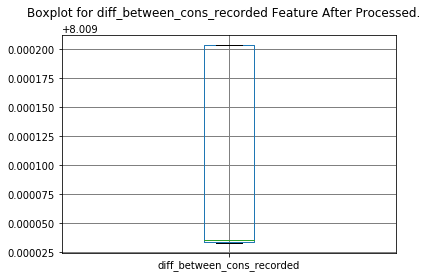

In [469]:
# Create Boxplot for Numerical features
for name in names_list:
    boxplot = train_data.boxplot(column=[name])
    plt.suptitle(f"Boxplot for {name} Feature After Processed.")
    plt.grid(linestyle='-', linewidth='1', color='grey')
    plt.savefig(f"../static/images/After_Box_plot_for_{name}_Feature.")
    plt.show()

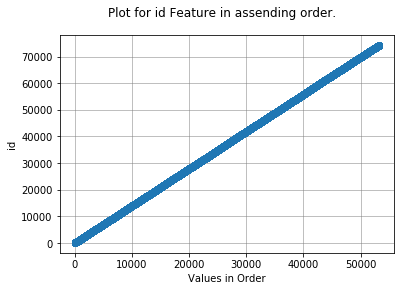

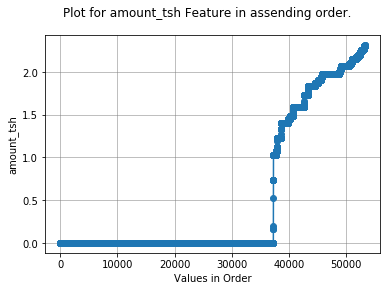

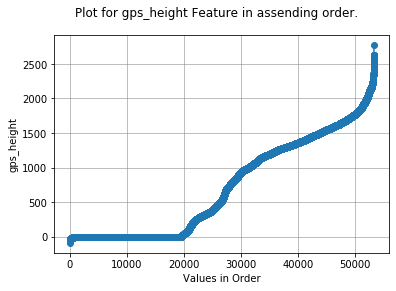

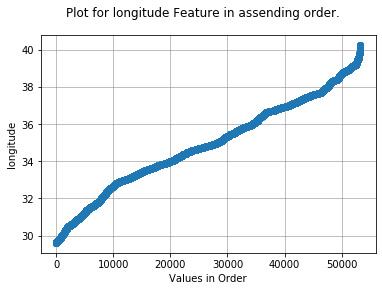

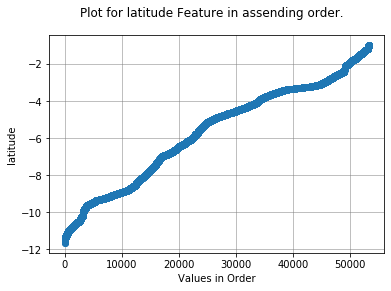

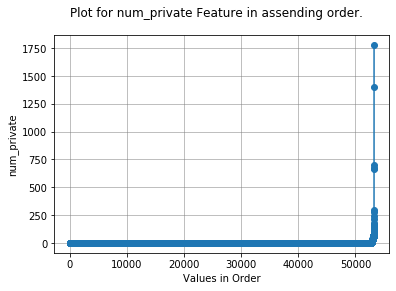

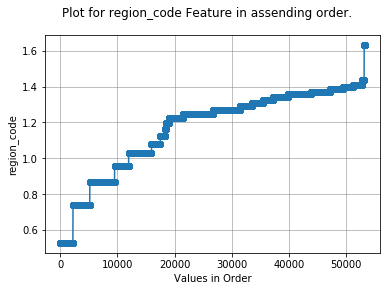

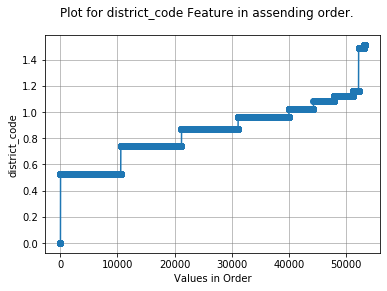

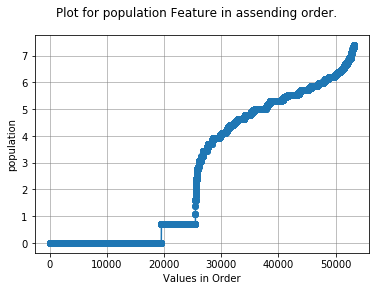

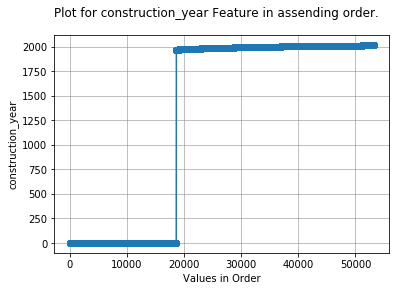

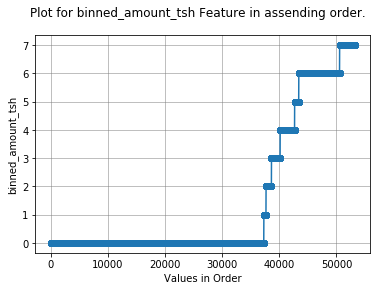

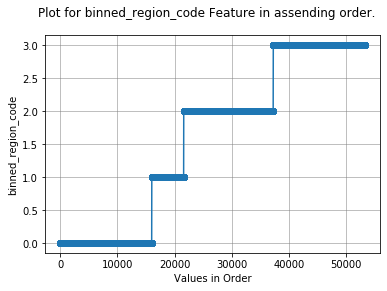

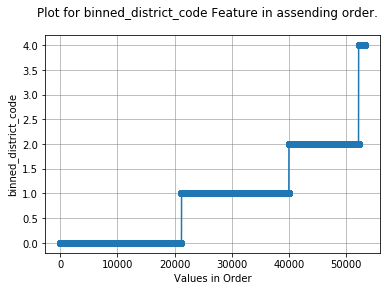

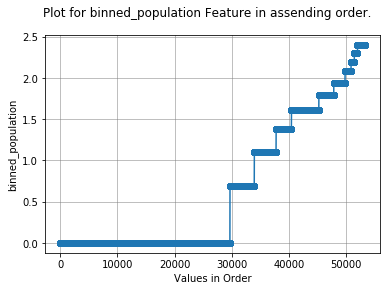

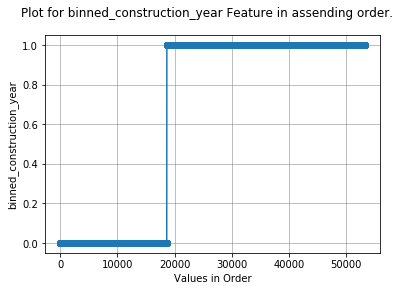

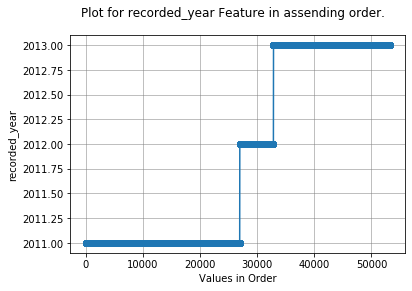

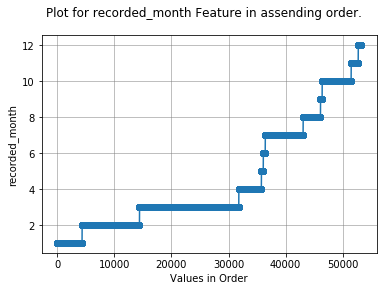

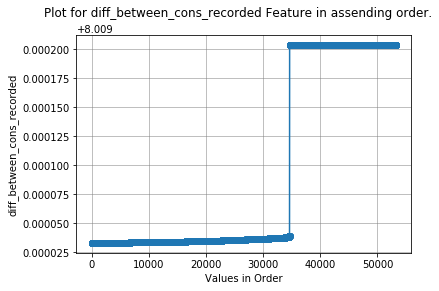

In [470]:
for name in names_list:
    y_values = train_data[name].sort_values(ascending=True)
    plt.plot(range(0, len(y_values) ), y_values, marker='o')
    #plt.plot(range(1, 40, 2), test_scores, marker="x")
    plt.xlabel("Values in Order")
    plt.ylabel(f"{name}")
    plt.suptitle(f"Plot for {name} Feature in assending order.")
    # Customize the grid
    plt.grid(linestyle='-', linewidth='0.5', color='grey')
    #save Plot to png
    plt.savefig(f"../static/images/After_{name}_Feature.")
    plt.show()

In [471]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year,recorded_year,recorded_month,diff_between_cons_recorded
id,1,-0.00576082,-0.00519677,0.00483035,-0.000542374,-0.000989104,0.000446477,4.39581e-05,0.00517487,0.00430862,-0.00446967,-0.000824041,-0.00605326,-0.00173787,0.000672042,0.00688987,-0.000785347,0.00299308,0.00258013,0.000840332
amount_tsh,-0.00576082,1,0.304651,0.168355,-0.250052,0.0141004,-0.0159507,-0.100061,0.353885,0.0952979,0.0708962,0.440005,0.987664,-0.128019,-0.108242,0.245546,0.439126,0.0767589,-0.281928,-0.440373
gps_height,-0.00519677,0.304651,1,0.0661349,-0.0384712,0.0075238,-0.0252184,-0.119895,0.482584,0.036504,0.0591691,0.700789,0.305616,-0.0501914,-0.157371,0.357935,0.700848,0.378264,-0.343544,-0.700612
longitude,0.00483035,0.168355,0.0661349,1,-0.198826,0.0510774,-0.633751,-0.034261,0.269079,0.02939,0.0211943,0.450324,0.128509,-0.779402,-0.0285277,0.119009,0.450079,0.0738883,-0.342272,-0.450517
latitude,-0.000542374,-0.250052,-0.0384712,-0.198826,1,0.00910234,0.00596465,-0.0268823,-0.0321175,0.00923643,0.123458,-0.141775,-0.271849,0.230102,-0.00966401,0.0253824,-0.142007,0.261025,0.268906,0.142075
num_private,-0.000989104,0.0141004,0.0075238,0.0510774,0.00910234,1,-0.0345343,0.000448466,0.00326923,0.00934214,0.0127428,0.0266783,0.00895026,-0.0473098,0.0078148,-0.0123961,0.026746,-0.012247,-0.0242837,-0.0266858
region_code,0.000446477,-0.0159507,-0.0252184,-0.633751,0.00596465,-0.0345343,1,0.0423364,-0.0920408,-0.0533068,-0.0270567,-0.193347,0.0039727,0.888621,0.0144393,-0.00563621,-0.193434,-0.0397788,0.269663,0.193333
district_code,4.39581e-05,-0.100061,-0.119895,-0.034261,-0.0268823,0.000448466,0.0423364,1,-0.114901,-0.00105278,-0.0675354,-0.179353,-0.112436,0.0489396,0.925105,-0.123207,-0.179467,-0.0900103,0.215313,0.179298
population,0.00517487,0.353885,0.482584,0.269079,-0.0321175,0.00326923,-0.0920408,-0.114901,1,0.0838522,0.0167326,0.748104,0.33655,-0.207171,-0.127181,0.914536,0.747545,0.351545,-0.362112,-0.748175
public_meeting,0.00430862,0.0952979,0.036504,0.02939,0.00923643,0.00934214,-0.0533068,-0.00105278,0.0838522,1,0.105796,0.0289994,0.100519,-0.0313821,-0.0227065,0.080579,0.0285573,-0.005909,-0.0761005,-0.029137


In [472]:
# Count unique values in columns
for col in train_data.columns:
    value = len(train_data[col].unique())
    print(f"Feature {col} has length of  {value} unique values.")

Feature id has length of  53256 unique values.
Feature amount_tsh has length of  68 unique values.
Feature funder has length of  1752 unique values.
Feature gps_height has length of  2424 unique values.
Feature installer has length of  1978 unique values.
Feature longitude has length of  53185 unique values.
Feature latitude has length of  53186 unique values.
Feature wpt_name has length of  34207 unique values.
Feature num_private has length of  62 unique values.
Feature basin has length of  9 unique values.
Feature subvillage has length of  17424 unique values.
Feature region has length of  21 unique values.
Feature region_code has length of  23 unique values.
Feature district_code has length of  11 unique values.
Feature lga has length of  116 unique values.
Feature ward has length of  1869 unique values.
Feature population has length of  832 unique values.
Feature public_meeting has length of  2 unique values.
Feature recorded_by has length of  1 unique values.
Feature scheme_manag

In [473]:
train_data.head(10)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year,recorded_year,recorded_month,diff_between_cons_recorded
0,69572,2.272093,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,1.248441,1.026672,Ludewa,Mundindi,4.700480,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,7,2,2,1.098612,1,2011,3,8.009034
1,8776,0.000000,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,1.397363,0.741276,Serengeti,Natta,5.638355,True,GeoData Consultants Ltd,Other,Roman,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,1.609438,1,2013,3,8.009033
2,34310,1.448822,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,1.408800,0.959135,Simanjiro,Ngorika,5.525453,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,3,3,1,1.609438,1,2013,2,8.009033
4,19728,0.000000,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,1.372307,0.526589,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,3,0,0.000000,0,2011,7,8.009203
5,9944,1.397363,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,0.959135,1.162283,Mkinga,Moa,0.693147,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,3,0,2,0.000000,1,2011,3,8.009033
6,19816,0.000000,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,1.358505,0.869742,Shinyanga Rural,Samuye,0.000000,True,GeoData Consultants Ltd,VWC,Zingibali,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0,3,1,0.000000,0,2012,10,8.009203
7,54551,0.000000,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,1.358505,0.869742,Kahama,Chambo,0.000000,True,GeoData Consultants Ltd,VWC,Zingibali,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,0,3,1,0.000000,0,2012,10,8.009203
8,53934,0.000000,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,1.310506,1.080418,Tabora Urban,Itetemia,0.000000,True,GeoData Consultants Ltd,VWC,Zingibali,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0,2,2,0.000000,0,2012,11,8.009203
9,46144,0.000000,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,1.372307,0.526589,Karagwe,Kaisho,0.00

In [474]:

print(len(train_data["extraction_type"].unique()))
print(train_data["extraction_type"].unique())

18
['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'other - swn 81'
 'india mark iii' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']


In [475]:
print(len(train_data["extraction_type_group"].unique()))
print(train_data["extraction_type_group"].unique())

13
['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'other handpump'
 'india mark iii' 'other motorpump']


In [476]:
print(len(train_data["extraction_type_class"].unique()))
print(train_data["extraction_type_class"].unique())

7
['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']


In [477]:
dummy_grouped = train_data.groupby(['waterpoint_type_group',"status_group"]).count()
dummy_grouped

id  amount_tsh  funder  \
waterpoint_type_group status_group                                         
cattle trough         functional                  73          73      73   
                      functional needs repair      2           2       2   
                      non functional              29          29      29   
communal standpipe    functional               18821       18821   18821   
                      functional needs repair   2724        2724    2724   
                      non functional           10657       10657   10657   
dam                   functional                   5           5       5   
                      non functional               1           1       1   
hand pump             functional                9352        9352    9352   
                      functional needs repair    618         618     618   
                      non functional            4967        4967    4967   
improved spring       functional                 541         541     541   
                      functional needs repair     82          82      82   
                      non functional             133         133     133   
other                 functional                 763         763     763   
                      functional needs repair    267         267     267   
                      non functional            4221        4221    4221   

                                               gps_height  installer  \
waterpoint_type_group status_group                                     
cattle trough         functional                       73         73   
                      functional needs repair           2          2   
                      non functional                   29         29   
communal standpipe    functional                    18821      18821   
                      functional needs repair        2724       2724   
                      non functional                10657      10657   
dam                   functional                        5          5   
                      non functional                    1          1   
hand pump             functional                     9352       9352   
                      functional needs repair         618        618   
                      non functional                 4967       4967   
improved spring       functional                      541        541   
                      functional needs repair          82         82   
                      non functional                  133        133   
other                 functional                      763        763   
                      functional needs repair         267        267   
                      non functional                 4221       4221   

                                               longitude  latitude  wpt_name  \
waterpoint_type_group status_group                                             
cattle trough         functional                      73        73        73   
                      functional needs repair          2         2         2   
                      non functional                  29        29        29   
communal standpipe    functional                   18821     18821     18821   
                      functional needs repair       2724      2724      2724   
                      non functional               10657     10657     10657   
dam                   functional                       5         5         5   
                      non functional                   1         1         1   
hand pump             functional                    9352      9352      9352   
                      functional needs repair        618       618       618   
                      non functional                4967      4967      4967   
improved spring       functional                     541       541       541   
                      functional needs repair         82        82        82   
                      non functional

In [478]:
# Tempurary drop sum collumn to manage them later
# droped funder Column  because it is unique for each row
train_data = train_data.drop("funder", axis=1)
# droped installer Column because it is unique for each row
train_data = train_data.drop("installer", axis=1)
# droped wpt_name because it is unique for each row
train_data = train_data.drop("subvillage", axis=1)
# droped recorded_by Column because there is only 1 value
train_data = train_data.drop("recorded_by", axis=1)
# droped payment Column because there is same with payment_type
train_data = train_data.drop("payment", axis=1)
# droped quality_group Column because there is same with water_quality column
train_data = train_data.drop("quality_group", axis=1)
# droped quantity_group Column because there is same with quantity column
train_data = train_data.drop("quantity_group", axis=1)
# droped waterpoint_type_group Column because there is same with waterpoint_type_group column
train_data = train_data.drop("waterpoint_type_group", axis=1)
# droped extraction_type_group Column because there is same with extraction_type column
train_data = train_data.drop("extraction_type_group", axis=1)
train_data.head()

,id,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_type,source_class,waterpoint_type,status_group,binned_amount_tsh,binned_region_code,binned_district_code,binned_population,binned_construction_year,recorded_year,recorded_month,diff_between_cons_recorded
0,69572,2.272093,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,1.248441,1.026672,Ludewa,Mundindi,4.700480,True,VWC,Roman,False,1999,gravity,gravity,vwc,user-group,annually,soft,enough,spring,spring,groundwater,communal standpipe,functional,7,2,2,1.098612,1,2011,3,8.009034
1,8776,0.000000,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,1.397363,0.741276,Serengeti,Natta,5.638355,True,Other,Roman,True,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional,0,3,0,1.609438,1,2013,3,8.009033
2,34310,1.448822,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,1.408800,0.959135,Simanjiro,Ngorika,5.525453,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,user-group,per bucket,soft,enough,dam,dam,surface,communal standpipe multiple,functional,3,3,1,1.609438,1,2013,2,8.009033
4,19728,0.000000,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,1.372307,0.526589,Karagwe,Nyakasimbi,0.000000,True,VWC,Nyumba ya mungu pipe scheme,True,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional,0,3,0,0.000000,0,2011,7,8.009203
5,9944,1.397363,0,39.172796,-4.765587,Tajiri,0,Pangani,Tanga,0.959135,1.162283,Mkinga,Moa,0.693147,True,VWC,Zingibali,True,2009,submersible,submersible,vwc,user-group,per bucket,salty,enough,other,other,unknown,communal standpipe multiple,functional,3,0,2,0.000000,1,2011,3,8.009033


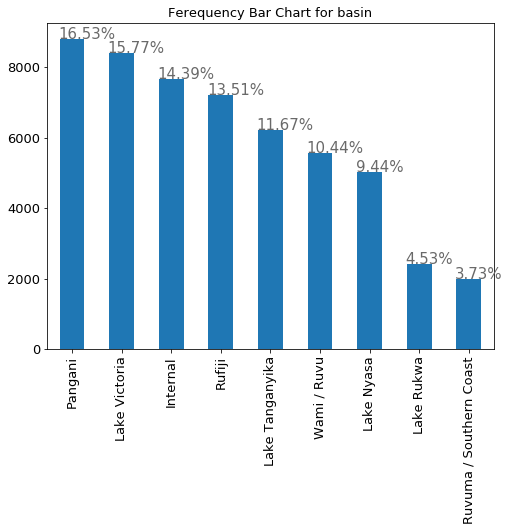

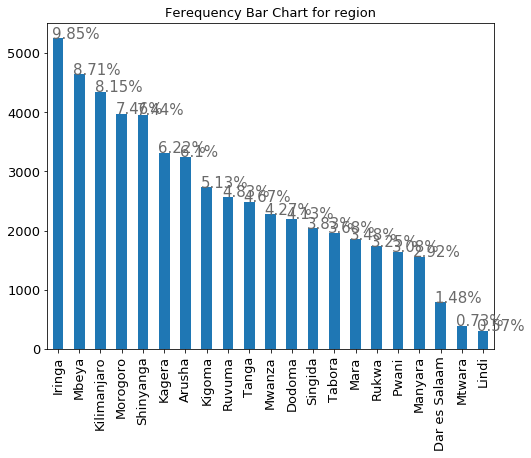

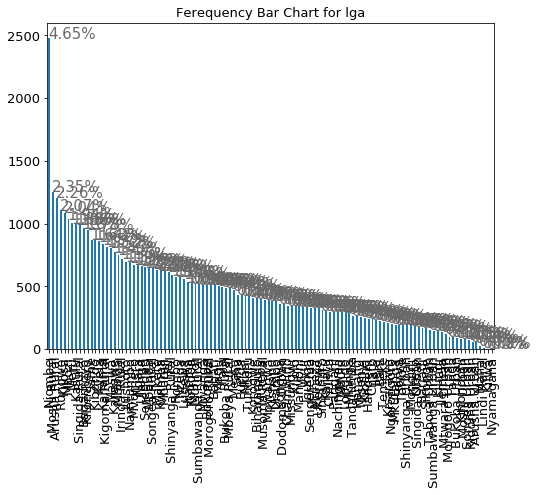

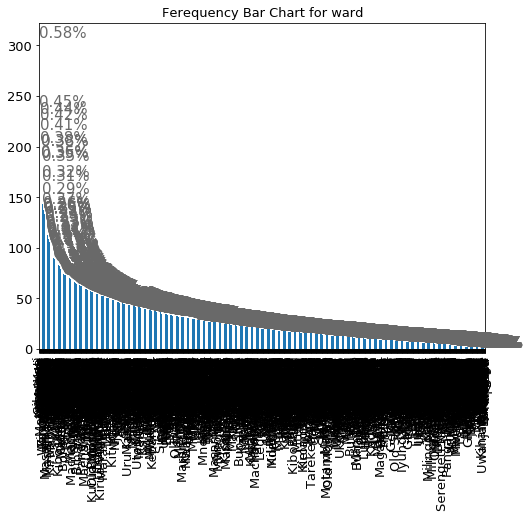

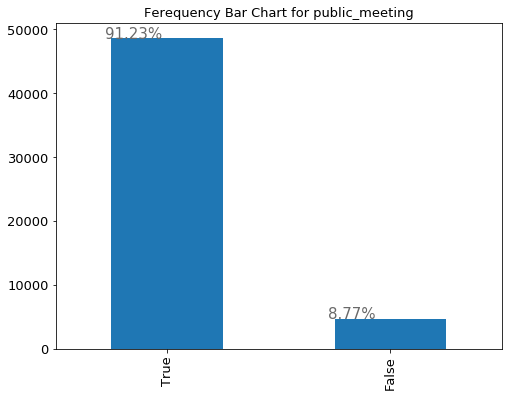

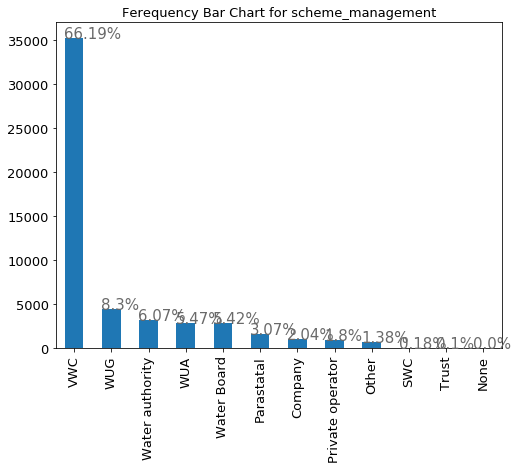

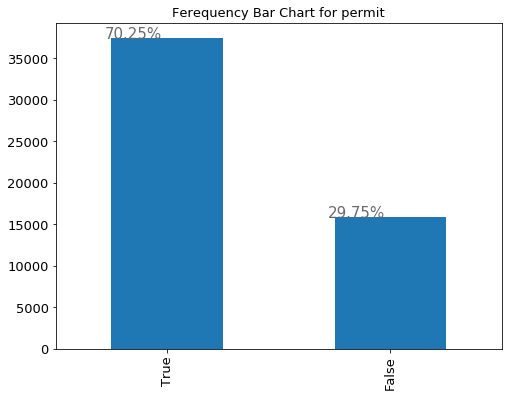

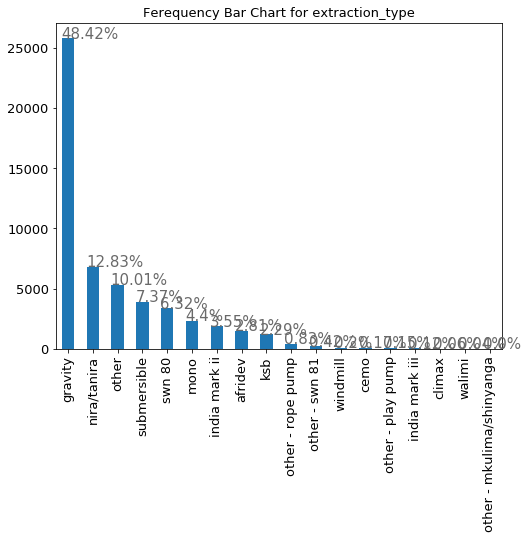

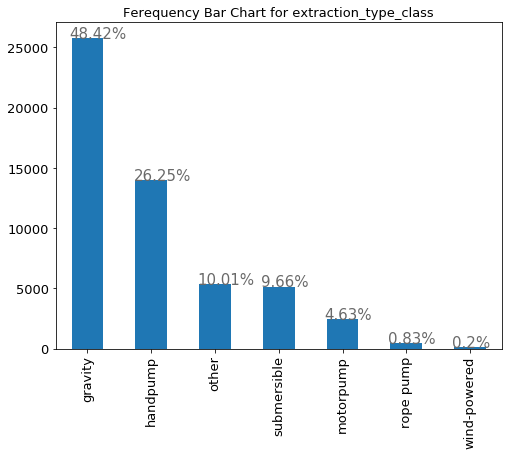

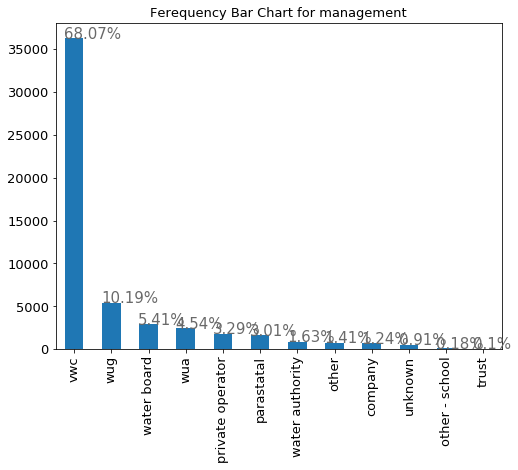

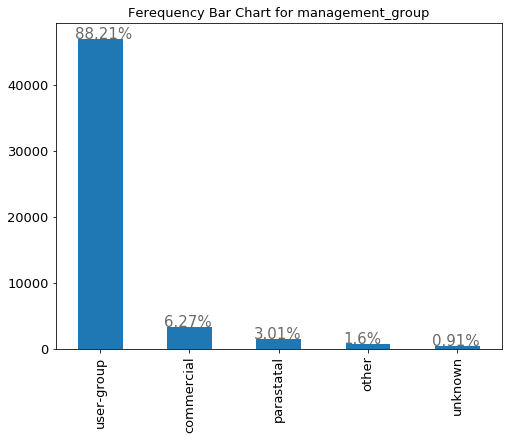

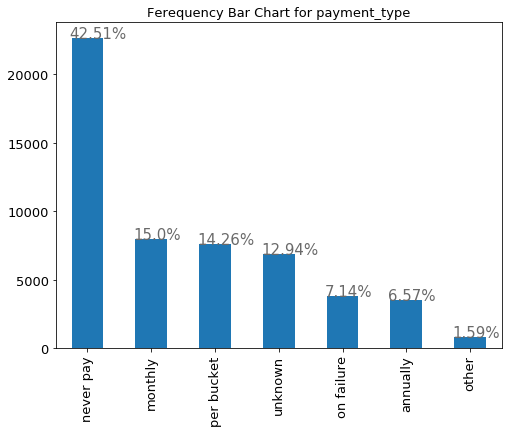

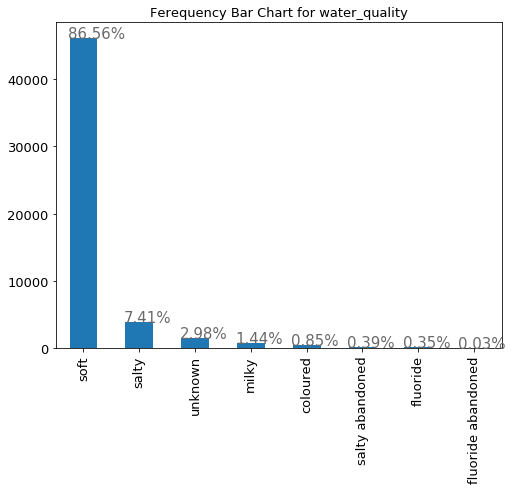

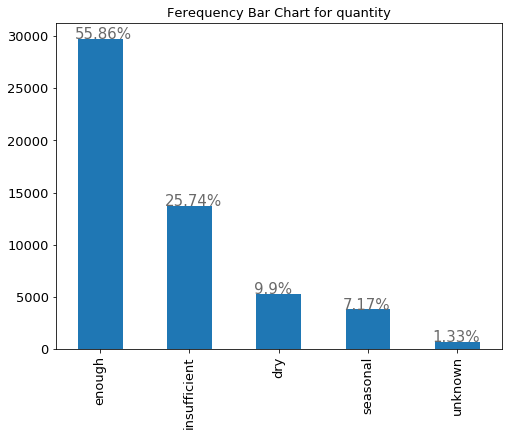

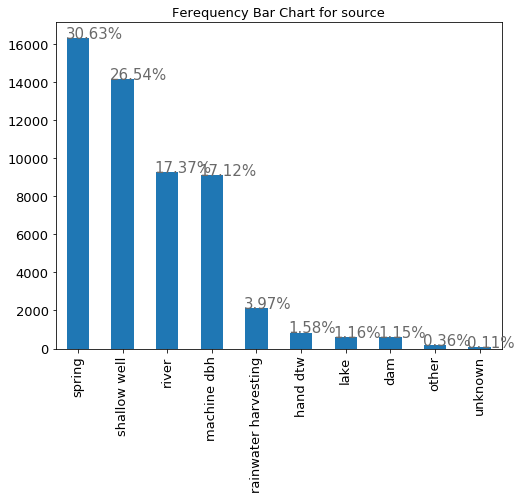

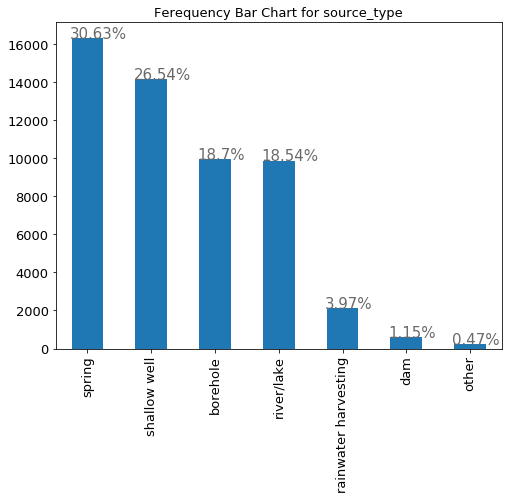

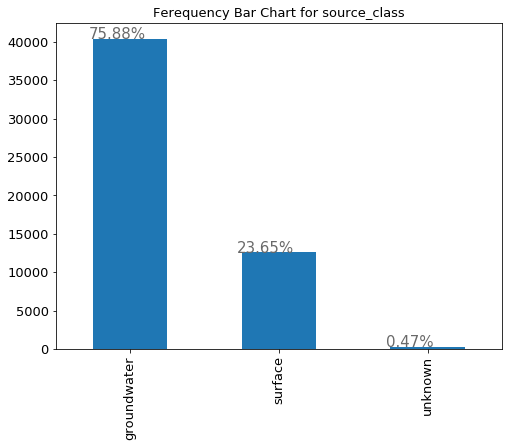

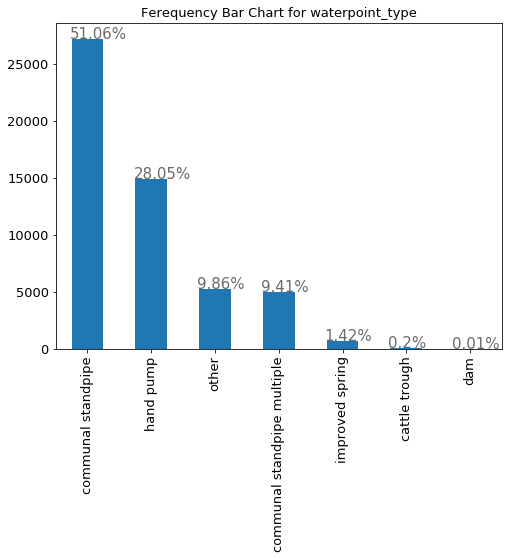

In [479]:
# Univariate Analysis for Categorical Features
# freguency table for Variable
columns = ["basin","region","lga","ward","public_meeting","scheme_management","permit","extraction_type","extraction_type_class","management","management_group"
          ,"payment_type","water_quality","quantity","source","source_type","source_class","waterpoint_type"]
for col in columns:
    
    ax = train_data[col].value_counts().plot(kind='bar',figsize=(8,6), fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(f"Ferequency Bar Chart for {col}", fontsize=13)

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
    plt.savefig(f"../static/images/Frequency_table_{col}_Feature.", bbox_inches = "tight")
    plt.show()

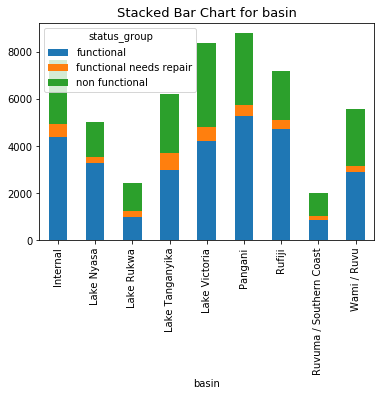

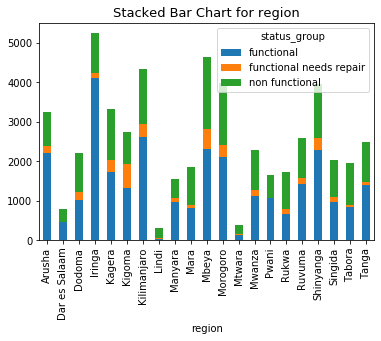

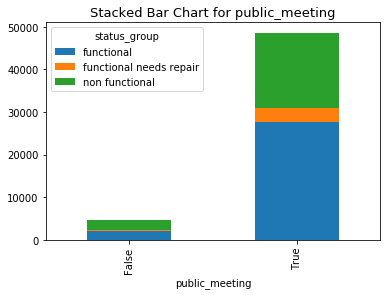

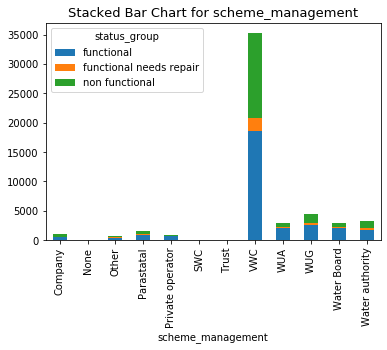

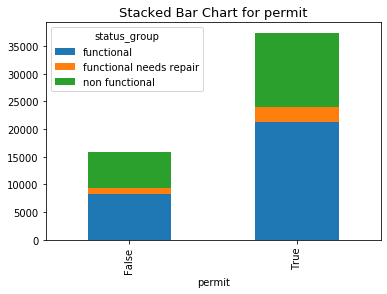

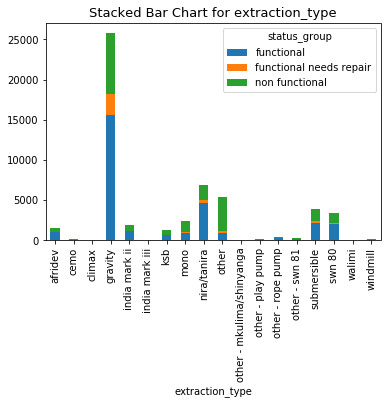

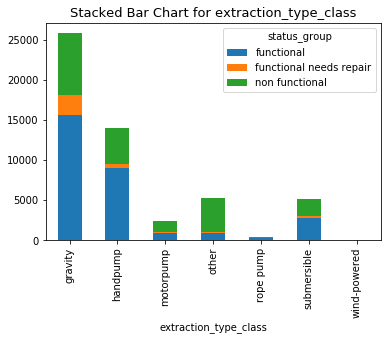

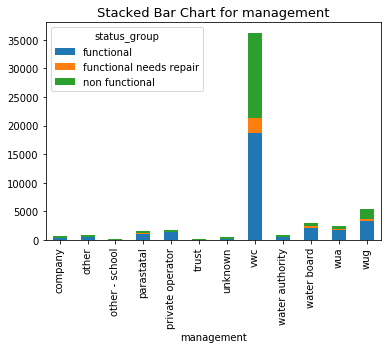

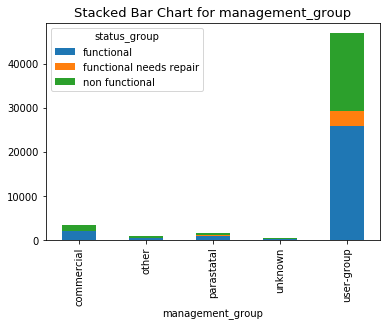

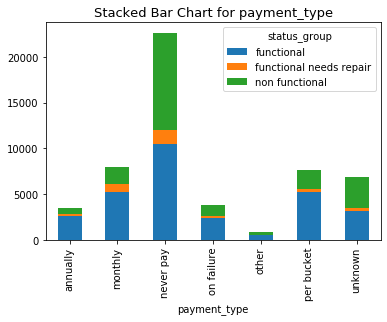

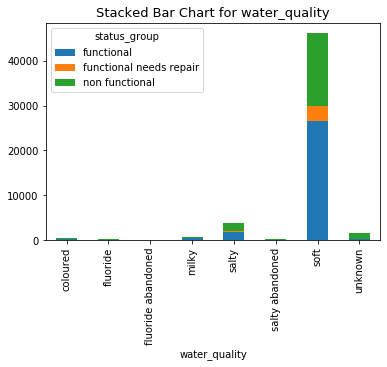

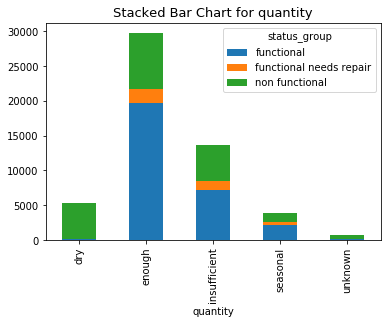

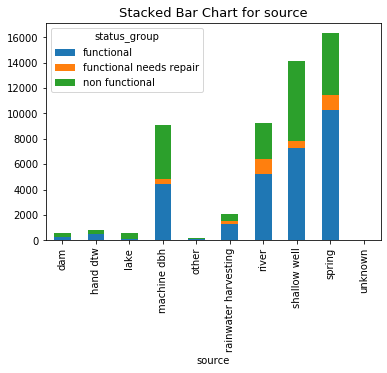

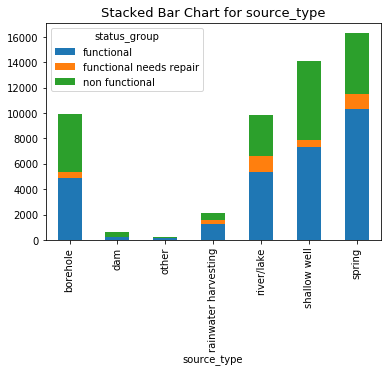

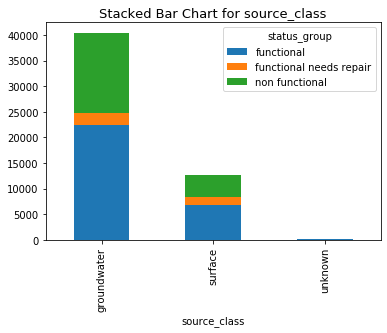

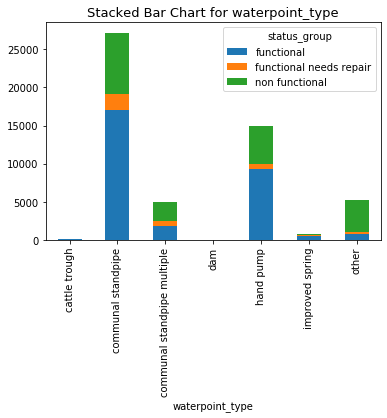

In [480]:
columns = ["basin","region","public_meeting","scheme_management","permit","extraction_type","extraction_type_class","management","management_group"
          ,"payment_type","water_quality","quantity","source","source_type","source_class","waterpoint_type"]
for col in columns:
    ax = train_data.groupby([ col, 'status_group']).size().unstack().plot(kind='bar', stacked=True)
    ax.set_alpha(0.8)
    ax.set_title(f"Stacked Bar Chart for {col}", fontsize=13)
    plt.savefig(f"../static/images/Stackec_bar_{col}_Feature.", bbox_inches = "tight")

In [ ]:
# Count unique values in columns
for col in train_data.columns:
    value = len(train_data[col].unique())
    print(f"Feature {col} has length of  {value} unique values.")

In [ ]:
# factorize status group 0 : func, 1 no  func , 2 : func but needs repair
# factorize status_group column to make it numeric
# factorize columns which has more unique value then 10 
train_data["region"] = train_data["region"].factorize()[0]
train_data["lga"] = train_data["lga"].factorize()[0]
train_data["ward"] = train_data["ward"].factorize()[0]
train_data["scheme_management"] = train_data["scheme_management"].factorize()[0]
train_data["extraction_type"] = train_data["extraction_type"].factorize()[0]
train_data["extraction_type_class"] = train_data["extraction_type_class"].factorize()[0]
train_data["management"] = train_data["management"].factorize()[0]
train_data["source"] = train_data["source"].factorize()[0]
train_data["status_group"] = train_data["status_group"].factorize()[0]
train_data.head(20)

In [ ]:
train_data.head(20)

In [ ]:
# get dummies for categorical columns with low unique
dummy_train_data = pd.get_dummies(train_data)
dummy_train_data.head()

In [ ]:
# convert boolean permit to int
dummy_train_data["permit"] = dummy_train_data["permit"].astype(int)
dummy_train_data.head()

In [ ]:
train_data = dummy_train_data

In [ ]:
# Bi-variate Analysis
# Bi-variate Analysis finds out the relationship between two variables.
# 1 - Continuous & Continuous:
# Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. 
# To find the strength of the relationship, we use Correlation.
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# 2 - Categorical & Categorical:
pd.crosstab(train_data["status_group"], train_data["waterpoint_type_other"],normalize=True, margins=True)

In [ ]:
#Stacked Column Chart: This method is more of a visual form of Two-way table.

# ? 

# need to look at this ?

In [ ]:
# Use Chi to see correlation between variables
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chisq_of_df_cols(train_data, 'status_group', 'waterpoint_type_other')

In [ ]:
# 3 - Categorical & Continuous:
# If levels are small in number, it will not show the statistical significance. 
# To look at the statistical significance we can perform Z-test, T-test or ANOVA.

In [ ]:
cleaned_data = train_data
#cleaned_data = cleaned_data[["status_group","longitude","Binned_gps_h",'variance',"construction_year","quantity_group","quantity","waterpoint_type","waterpoint_type_group","region_code"]]
cleaned_data.to_csv("cleaned_data.csv", index=False)      
 

In [ ]:
#Print sklearn version
print('The scikit-learn version is {}.'.format(sklearn.__version__))

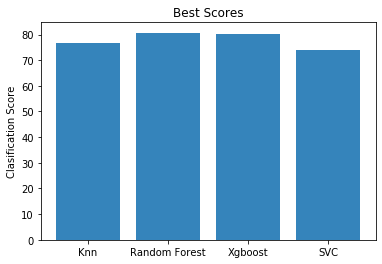

In [74]:
# ML visualization

objects = ["Knn", "Random Forest", "Xgboost", "SVC"]
y_pos = np.arange(len(objects))
performance = [76.57, 80.70, 80.36,  73.86]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Clasification Score')
plt.title('Best Scores')
plt.savefig(f"../static/images/Best_scores.", bbox_inches = "tight")
plt.show()